In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [4]:
def f(x,y):
    return x + 2*y

In [5]:
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

In [6]:
N = 5
t = np.linspace(0,1,N)
t

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [7]:
h = t[1] - t[0]

In [8]:
yext = Solucion(t)

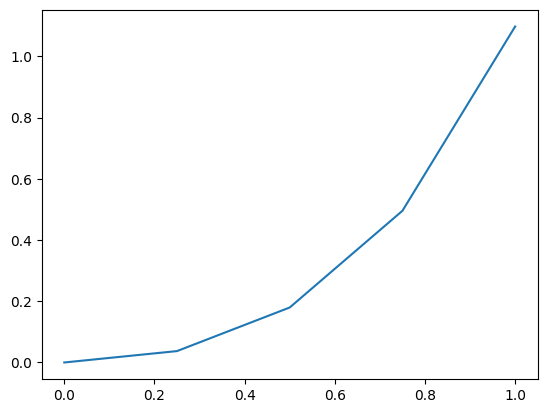

In [9]:
plt.plot(t,yext)

In [11]:
def GetEuler(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        y[i] = y[i-1] + h*k1


In [12]:
y1 = np.zeros_like(t)
y1[0] = 0

In [13]:
GetEuler(t,y1,h)

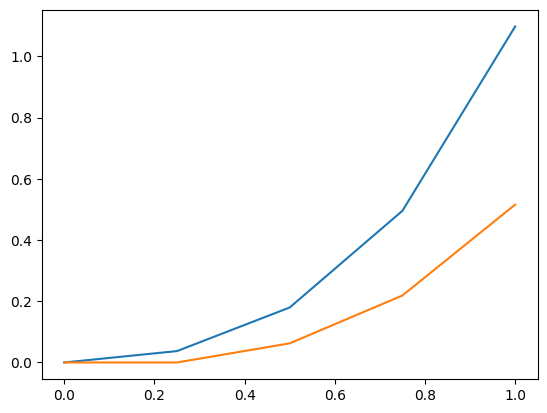

In [14]:
plt.plot(t,yext)
plt.plot(t,y1)